# Main 

## Initialisation 

### Import des librairies

In [114]:
import pandas as pd # Pour manipuler des dataframes
import numpy as np # Pour manipuler des arrays
import matplotlib.pyplot as plt # Pour afficher des graphiques
import seaborn as sns # Pour améliorer l'affichage des graphiques

### Import des données

In [115]:
# Paramètres
nbLignes = 2000000
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)

# noms fichiers
donneesOctobre2019 = "2019-Oct.csv.gz"

# Chargement des données
df = pd.read_csv(donneesOctobre2019, nrows=nbLignes)
print(df.head())

                event_time event_type  product_id          category_id                        category_code     brand    price    user_id                          user_session
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724                                  NaN  shiseido    35.79  541312140  72d76fde-8bb3-4e00-8c23-a032dfed738c
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905  appliances.environment.water_heater      aqua    33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471           furniture.living_room.sofa       NaN   543.10  519107250  566511c2-e2e3-422b-b695-cf8e6e792ca8
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191                   computers.notebook    lenovo   251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655               electronics.smartphone     apple  1

### Préparation des données

In [116]:
# Prépration des données

# On convertit la colonne 'event_time' en datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# On supprime les lignes avec des valeurs manquantes dans les colonnes 'price', 'category_code' et 'user_id'
df.dropna(subset=['price', 'category_code', 'user_id'], inplace=True)

# Si brand est manquant ou égal à "NaN" on le remplace par la valeur "unknown"
df['brand'] = df['brand'].replace(np.nan, 'unknown')

print(df.head(5))

                 event_time event_type  product_id          category_id                        category_code    brand    price    user_id                          user_session
1 2019-10-01 00:00:00+00:00       view     3900821  2053013552326770905  appliances.environment.water_heater     aqua    33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc
2 2019-10-01 00:00:01+00:00       view    17200506  2053013559792632471           furniture.living_room.sofa  unknown   543.10  519107250  566511c2-e2e3-422b-b695-cf8e6e792ca8
3 2019-10-01 00:00:01+00:00       view     1307067  2053013558920217191                   computers.notebook   lenovo   251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713
4 2019-10-01 00:00:04+00:00       view     1004237  2053013555631882655               electronics.smartphone    apple  1081.98  535871217  c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5 2019-10-01 00:00:05+00:00       view     1480613  2053013561092866779                    computers.desktop   pulser   

#### Vérification des valeurs manquantes / nulls / nan

In [117]:
# Afficher le nombre de valeurs manquantes par colonne
print("\nNombre de valeurs Null :\n\n", df.isnull().sum())

# Afficher le nombre de valeurs "NaN" par colonne
print("\nNombre de valeurs Nan :\n\n", df.isna().sum())


Nombre de valeurs Null :

 event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

Nombre de valeurs Nan :

 event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


### Création du DataFrame Achats

In [118]:
# Création du DataFrame Achats (avec les évènements précédents l'achat)
purchases = df[df['event_type'] == 'purchase']
print(purchases.head())

                   event_time event_type  product_id          category_id                category_code    brand   price    user_id                          user_session
162 2019-10-01 00:02:14+00:00   purchase     1004856  2053013555631882655       electronics.smartphone  samsung  130.76  543272936  8187d148-3c41-46d4-b0c0-9c08cd9dc564
308 2019-10-01 00:04:37+00:00   purchase     1002532  2053013555631882655       electronics.smartphone    apple  642.69  551377651  3c80f0d6-e9ec-4181-8c5c-837a30be2d68
442 2019-10-01 00:07:07+00:00   purchase    13800054  2053013557418656265    furniture.bathroom.toilet  santeri   54.42  555332717  1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574 2019-10-01 00:09:26+00:00   purchase     4804055  2053013554658804075  electronics.audio.headphone    apple  189.91  524601178  2af9b570-0942-4dcd-8f25-4d84fba82553
603 2019-10-01 00:09:54+00:00   purchase     4804056  2053013554658804075  electronics.audio.headphone    apple  161.98  551377651  3c80f0d6-e9ec-4181-8c5c

## Exploration des données

### Evènements avant achat

### Produit le plus acheté basé sur les achats précédents (TODO)

## Recommandation de Produits

In [119]:
# Le but est de recommander des produits que l'utilisateur serait susceptible d'acheter.

# Filtrage Collaboratif

## Prédiction des ventes

## Modélisations de clients types (Segmentation)

#### Création du dataframe User

In [120]:
# Montant total dépensé par utilisateur
total_spent = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum().reset_index()
total_spent.columns = ['user_id', 'total_spent']

# Nombre total d'achats par utilisateur
total_purchases = df[df['event_type'] == 'purchase'].groupby('user_id')['product_id'].count().reset_index()
total_purchases.columns = ['user_id', 'total_purchases']

# Nombre total de vues par utilisateur
total_views = df[df['event_type'] == 'view'].groupby('user_id')['product_id'].count().reset_index()
total_views.columns = ['user_id', 'total_views']

# Nombre de catégories uniques vues par utilisateur
unique_categories = df.groupby('user_id')['category_code'].nunique().reset_index()
unique_categories.columns = ['user_id', 'unique_categories_viewed']

# Nombre de produits uniques vus par utilisateur
unique_products = df.groupby('user_id')['product_id'].nunique().reset_index()
unique_products.columns = ['user_id', 'unique_products_viewed']

# Nombre total de sessions
total_sessions = df.groupby('user_id')['user_session'].nunique().reset_index()
total_sessions.columns = ['user_id', 'total_sessions']


# Création du DataFrame utilisateur
user_df = total_spent.merge(total_purchases, on='user_id').merge(total_views, on='user_id').merge(unique_categories, on='user_id').merge(unique_products, on='user_id').merge(total_sessions, on='user_id')

print(user_df.head())

     user_id  total_spent  total_purchases  total_views  unique_categories_viewed  unique_products_viewed  total_sessions
0  433754231       321.73                1           73                         1                      24               3
1  437371552       358.29                2            6                         1                       2               1
2  451971397       199.17                1            3                         2                       2               2
3  453705583       141.57                1            7                         1                       2               2
4  457360398        51.46                1           13                         1                       7               1


#### Normalisation des données

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalisation des données
user_df_scaled = scaler.fit_transform(user_df.drop('user_id', axis=1))

# Remettre les données normalisées dans un DataFrame
user_df_scaled = pd.DataFrame(user_df_scaled, columns=user_df.columns[1:])


print(user_df_scaled.head())

   total_spent  total_purchases  total_views  unique_categories_viewed  unique_products_viewed  total_sessions
0    -0.231242        -0.339366     4.131854                 -0.401797                3.072500        0.391533
1    -0.191096         0.433525    -0.275972                 -0.401797               -0.392859       -0.610808
2    -0.365822        -0.339366    -0.473337                  0.661733               -0.392859       -0.109638
3    -0.429072        -0.339366    -0.210183                 -0.401797               -0.392859       -0.109638
4    -0.528019        -0.339366     0.184547                 -0.401797                0.394722       -0.610808


#### Segmentation avec K-means

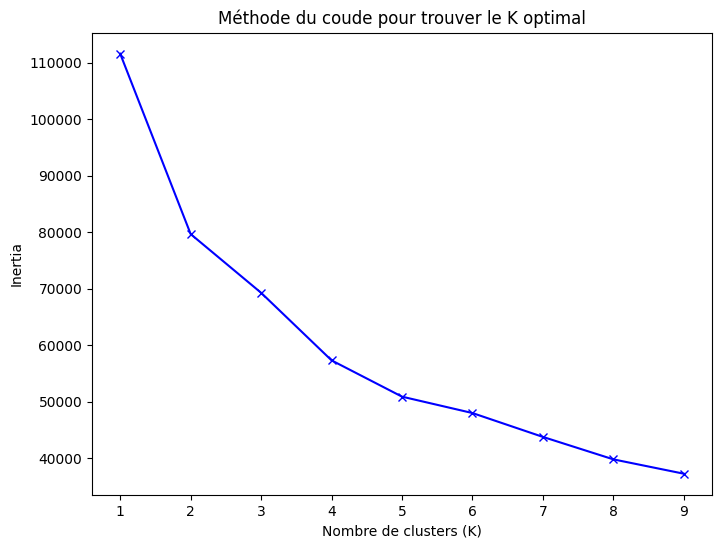

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tester plusieurs valeurs de K
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_df_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour trouver le K optimal')
plt.show()


In [128]:
optimal_k = 5 # Le coude est à K=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
user_df['cluster'] = kmeans.fit_predict(user_df_scaled)


cluster_analysis = user_df.drop(columns=['user_id']).groupby('cluster').mean()
print("\nMoyenne selon les clusters :\n\n",cluster_analysis)





         total_spent  total_purchases  total_views  unique_categories_viewed  unique_products_viewed  total_sessions
cluster                                                                                                             
0         394.692977         1.157184     4.989190                  1.108319                2.310058        1.497553
1         500.951512         2.050403    69.219758                  3.913306               30.288306        7.556452
2        2149.810232         3.781411    13.341652                  1.377797                4.951807        3.318417
3        8330.350854        13.439024    40.865854                  2.207317               10.756098        9.219512
4         336.932433         1.391922    21.498896                  2.123698                9.562638        3.914800
